In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the data into the pandas dataframe
df = pd.read_csv("ANZ.csv")
df.head() #displaying the first few rows of our data

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.info() #extracting the concise summary of the data 

#to check for nullvalues; print(ANZ.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   status             12043 non-null  object 
 1   card_present_flag  7717 non-null   float64
 2   bpay_biller_code   885 non-null    object 
 3   account            12043 non-null  object 
 4   currency           12043 non-null  object 
 5   long_lat           12043 non-null  object 
 6   txn_description    12043 non-null  object 
 7   merchant_id        7717 non-null   object 
 8   merchant_code      883 non-null    float64
 9   first_name         12043 non-null  object 
 10  balance            12043 non-null  float64
 11  date               12043 non-null  object 
 12  gender             12043 non-null  object 
 13  age                12043 non-null  int64  
 14  merchant_suburb    7717 non-null   object 
 15  merchant_state     7717 non-null   object 
 16  extraction         120

In [12]:
df_clean = pd.read_csv('ANZ.csv', usecols=[0,6,9,11,12,13,17,20])
#Feature selection, selecting important features

In [13]:
df_clean.head()

,status,txn_description,first_name,date,gender,age,amount,customer_id
0,authorized,POS,Diana,8/1/2018,F,26,16.25,CUS-2487424745
1,authorized,SALES-POS,Diana,8/1/2018,F,26,14.19,CUS-2487424745
2,authorized,POS,Michael,8/1/2018,M,38,6.42,CUS-2142601169
3,authorized,SALES-POS,Rhonda,8/1/2018,F,40,40.90,CUS-1614226872
4,authorized,SALES-POS,Diana,8/1/2018,F,26,3.25,CUS-2487424745


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   status           12043 non-null  object 
 1   txn_description  12043 non-null  object 
 2   first_name       12043 non-null  object 
 3   date             12043 non-null  object 
 4   gender           12043 non-null  object 
 5   age              12043 non-null  int64  
 6   amount           12043 non-null  float64
 7   customer_id      12043 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 752.8+ KB


In [15]:
# fixing incorrect data type (date)
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   status           12043 non-null  object        
 1   txn_description  12043 non-null  object        
 2   first_name       12043 non-null  object        
 3   date             12043 non-null  datetime64[ns]
 4   gender           12043 non-null  object        
 5   age              12043 non-null  int64         
 6   amount           12043 non-null  float64       
 7   customer_id      12043 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 752.8+ KB


In [17]:
df_clean.gender= pd.get_dummies(df_clean.gender) 
#encoding the gender feature into ones and zeros
# males are zeros and females are ones.

df_clean.head()

,status,txn_description,first_name,date,gender,age,amount,customer_id
0,authorized,POS,Diana,2018-08-01,1,26,16.25,CUS-2487424745
1,authorized,SALES-POS,Diana,2018-08-01,1,26,14.19,CUS-2487424745
2,authorized,POS,Michael,2018-08-01,0,38,6.42,CUS-2142601169
3,authorized,SALES-POS,Rhonda,2018-08-01,1,40,40.90,CUS-1614226872
4,authorized,SALES-POS,Diana,2018-08-01,1,26,3.25,CUS-2487424745


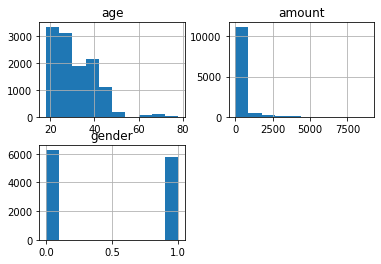

In [18]:
%matplotlib inline
df_clean.hist();

In [19]:
df_clean[df_clean['txn_description']== 'PAY/SALARY'].groupby(['first_name'])['amount'].sum()
# anywhere the txn is pay/salary, print the first name and sum of amount.

first_name
Abigail      25305.41
Alexander    21897.06
Amy           9782.16
Andrew        9389.04
Antonio      15384.74
               ...   
Tim          35343.92
Timothy       9844.98
Tonya        19881.05
Tyler        31927.72
Virginia     14804.27
Name: amount, Length: 80, dtype: float64